<a href="https://colab.research.google.com/github/LittleAlchemy/ML_bike_sharing/blob/main/Predicting_bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 952 kB 5.2 MB/s            
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 46.9 MB 1.6 MB/s             
     |████████████████████████████████| 8.6 MB 25.6 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080039 sha256=bea8ba22d2973e7b7d23b611343334050b2c8a23589f890c157bbba323a67b55
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you h

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "mansichilwant"
kaggle_key = "9def564b40b3dd4d083808f8e4be3d0f"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 43.6MB/s]
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 45.8MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 102MB/s]
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates = ['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

In [ ]:
eval_metric = 'root_mean_squared_error' 
X_train = train.drop(['casual','registered'], axis = 1)
y_train = train['count']

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label='count', eval_metric=eval_metric).fit(X_train, presets='best_quality', time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20211130_064838/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211130_064838/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12671.65 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	48.6s	 = Training   runtime
	2.39s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 342.4s of the 542.41s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argum

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	13.16s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 327.13s of the 527.14s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	7.82s	 = Training   runtime

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.582590       7.735263  537.249552                0.000902           0.452358            3       True         20
1   NeuralNetFastAI_BAG_L2 -115.196340       6.721867  478.592460                0.417512          96.893376            2       True         18
2        LightGBMXT_BAG_L2 -115.906511       6.604457  393.386220                0.300102          11.687137            2       True         13
3          CatBoost_BAG_L2 -116.208656       6.346687  412.614829                0.042332          30.915745            2       True         16
4          LightGBM_BAG_L2 -116.893719       6.402428  389.515469                0.098073           7.816385            2       True         14
5     ExtraTreesMSE_BAG_L2 -117.546233       6.876343  389.484550         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3 -114.582590  ...       True         20
 1   NeuralNetFastAI_BAG_L2 -115.196340  ...       True         18
 2        LightGBMXT_BAG_L2 -115.906511  ...       True         13
 3          CatBoost_BAG_L2 -116.208656  ...       True         16
 4          LightGBM_BAG_L2 -116.893719  ...       True         14
 5     ExtraTreesMSE_BAG_L2 -117.546233  ...       True         17
 6           XGBoost_BAG_L2 -118.107457  ...       True         19
 7      WeightedEnsemble_L2 -118.432800  ...       True         12
 8   RandomForestMSE_BAG_L1 -118.456660  ...       True          5
 9   RandomForestMSE_BAG_L2 -119.227586  ...       True         15
 10    ExtraTreesMSE_BAG_L1 -128.733445  ...       True          7
 11         LightGBM_BAG_L1 -132.286410  ...       True          4
 12          XGBoost_BAG_L1 -132.308522  ...       True          9
 13         CatBoost_BAG_L1 -132.349692  ...   

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0     94.906532
1     91.959518
2     91.947357
3    104.034851
4    103.971420
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      211.801849
std       129.459991
min       -12.251987
25%       106.217453
50%       194.248352
75%       298.784027
max       669.311218
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count)        

3


In [ ]:
# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()       

count    6493.000000
mean      211.806381
std       129.452377
min         0.000000
25%       106.217453
50%       194.248352
75%       298.784027
max       669.311218
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 173kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv               2021-11-30 07:04:13  first raw submission  complete  1.39576      1.39576       
submission.csv               2021-11-29 08:38:11  first raw submission  complete  1.39518      1.39518       
submission_new_features.csv  2021-11-29 07:01:28  new features          complete  1.39575      1.39575       


#### Initial score of `1.39576`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48b63bd250>,
      dtype=object)

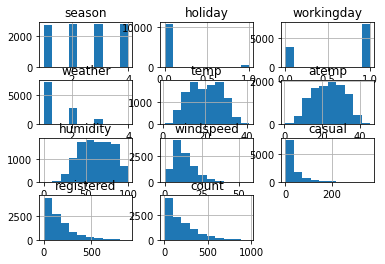

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [ ]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

train = train.drop('datetime', axis = 1)
train = train.drop(['casual','registered'], axis = 1)
test = test.drop('datetime', axis = 1)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48b5c9bd90>,
      dtype=object)

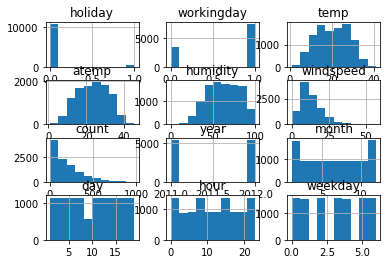

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label='count', eval_metric=eval_metric).fit(train, presets='best_quality', time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20211130_070600/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211130_070600/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11512.71 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column 

[1000]	train_set's rmse: 28.6163	valid_set's rmse: 36.5134
[2000]	train_set's rmse: 22.9702	valid_set's rmse: 34.2596
[3000]	train_set's rmse: 20.1858	valid_set's rmse: 33.8541
[4000]	train_set's rmse: 18.2791	valid_set's rmse: 33.776
[5000]	train_set's rmse: 16.8218	valid_set's rmse: 33.7282
[6000]	train_set's rmse: 15.6598	valid_set's rmse: 33.7603


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 28.2113	valid_set's rmse: 40.0611
[2000]	train_set's rmse: 22.9874	valid_set's rmse: 37.2505
[3000]	train_set's rmse: 20.3385	valid_set's rmse: 36.5258
[4000]	train_set's rmse: 18.4422	valid_set's rmse: 36.2574
[5000]	train_set's rmse: 17.0178	valid_set's rmse: 36.1223
[6000]	train_set's rmse: 15.8561	valid_set's rmse: 36.0315
[7000]	train_set's rmse: 14.8587	valid_set's rmse: 36.013
[8000]	train_set's rmse: 14.0052	valid_set's rmse: 35.9982
[9000]	train_set's rmse: 13.2605	valid_set's rmse: 36.0001


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 28.2572	valid_set's rmse: 32.8629
[2000]	train_set's rmse: 23.2511	valid_set's rmse: 31.3448
[3000]	train_set's rmse: 20.5647	valid_set's rmse: 31.1039
[4000]	train_set's rmse: 18.6787	valid_set's rmse: 31.0291
[5000]	train_set's rmse: 17.2376	valid_set's rmse: 31.0318


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 28.0563	valid_set's rmse: 39.2813
[2000]	train_set's rmse: 22.8646	valid_set's rmse: 37.1504
[3000]	train_set's rmse: 20.2354	valid_set's rmse: 36.5117
[4000]	train_set's rmse: 18.4503	valid_set's rmse: 36.2095
[5000]	train_set's rmse: 17.0745	valid_set's rmse: 36.0264
[6000]	train_set's rmse: 15.9063	valid_set's rmse: 35.82
[7000]	train_set's rmse: 14.9477	valid_set's rmse: 35.7034
[8000]	train_set's rmse: 14.1389	valid_set's rmse: 35.6084
[9000]	train_set's rmse: 13.4094	valid_set's rmse: 35.5745
[10000]	train_set's rmse: 12.7715	valid_set's rmse: 35.583


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 28.1458	valid_set's rmse: 36.5853
[2000]	train_set's rmse: 22.9452	valid_set's rmse: 34.7036
[3000]	train_set's rmse: 20.2613	valid_set's rmse: 34.5487
[4000]	train_set's rmse: 18.426	valid_set's rmse: 34.4196
[5000]	train_set's rmse: 16.9689	valid_set's rmse: 34.4381


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 28.0308	valid_set's rmse: 37.8682
[2000]	train_set's rmse: 22.8287	valid_set's rmse: 36.4583
[3000]	train_set's rmse: 20.096	valid_set's rmse: 36.1725
[4000]	train_set's rmse: 18.2508	valid_set's rmse: 36.1143
[5000]	train_set's rmse: 16.8345	valid_set's rmse: 36.1187


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 28.5224	valid_set's rmse: 38.3318
[2000]	train_set's rmse: 23.2013	valid_set's rmse: 35.0392
[3000]	train_set's rmse: 20.4699	valid_set's rmse: 34.0114
[4000]	train_set's rmse: 18.5791	valid_set's rmse: 33.6053
[5000]	train_set's rmse: 17.1089	valid_set's rmse: 33.3608
[6000]	train_set's rmse: 15.8987	valid_set's rmse: 33.2494
[7000]	train_set's rmse: 14.8925	valid_set's rmse: 33.1992
[8000]	train_set's rmse: 14.0193	valid_set's rmse: 33.1855


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 28.3868	valid_set's rmse: 37.2137
[2000]	train_set's rmse: 23.0291	valid_set's rmse: 35.3906
[3000]	train_set's rmse: 20.3307	valid_set's rmse: 35.0149
[4000]	train_set's rmse: 18.4199	valid_set's rmse: 34.9126
[5000]	train_set's rmse: 16.9434	valid_set's rmse: 34.8572
[6000]	train_set's rmse: 15.7795	valid_set's rmse: 34.8757


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 27.484	valid_set's rmse: 39.4259
[2000]	train_set's rmse: 22.6972	valid_set's rmse: 38.0415
[3000]	train_set's rmse: 20.1326	valid_set's rmse: 37.7033
[4000]	train_set's rmse: 18.3331	valid_set's rmse: 37.5197
[5000]	train_set's rmse: 16.8814	valid_set's rmse: 37.4413


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 27.9489	valid_set's rmse: 35.0349
[2000]	train_set's rmse: 23.1329	valid_set's rmse: 33.6254
[3000]	train_set's rmse: 20.5427	valid_set's rmse: 33.2265
[4000]	train_set's rmse: 18.7143	valid_set's rmse: 32.9731
[5000]	train_set's rmse: 17.2593	valid_set's rmse: 32.8442
[6000]	train_set's rmse: 16.074	valid_set's rmse: 32.7649
[7000]	train_set's rmse: 15.1096	valid_set's rmse: 32.7602
[8000]	train_set's rmse: 14.2508	valid_set's rmse: 32.7413
[9000]	train_set's rmse: 13.5028	valid_set's rmse: 32.7025
[10000]	train_set's rmse: 12.8285	valid_set's rmse: 32.7231


	-34.5297	 = Validation score   (root_mean_squared_error)
	105.35s	 = Training   runtime
	5.51s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 275.13s of the 475.13s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.8144	valid_set's rmse: 34.5176


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.846	valid_set's rmse: 34.427
[2000]	train_set's rmse: 14.3039	valid_set's rmse: 33.7285
[3000]	train_set's rmse: 11.2663	valid_set's rmse: 33.4853


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.8697	valid_set's rmse: 29.0867


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.766	valid_set's rmse: 36.3595
[2000]	train_set's rmse: 14.3417	valid_set's rmse: 35.4445
[3000]	train_set's rmse: 11.4008	valid_set's rmse: 35.0991
[4000]	train_set's rmse: 9.15962	valid_set's rmse: 34.9405
[5000]	train_set's rmse: 7.59445	valid_set's rmse: 34.8644
[6000]	train_set's rmse: 6.36802	valid_set's rmse: 34.8052


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.8315	valid_set's rmse: 36.0416
[2000]	train_set's rmse: 14.1709	valid_set's rmse: 35.4921


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.6911	valid_set's rmse: 36.9723
[2000]	train_set's rmse: 14.2916	valid_set's rmse: 36.4007


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.7018	valid_set's rmse: 32.2929


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.3621	valid_set's rmse: 33.113
[2000]	train_set's rmse: 14.0321	valid_set's rmse: 32.7125


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.6231	valid_set's rmse: 38.0794


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.7985	valid_set's rmse: 34.8811
[2000]	train_set's rmse: 14.4693	valid_set's rmse: 34.3345


	-34.1556	 = Validation score   (root_mean_squared_error)
	36.42s	 = Training   runtime
	1.67s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 232.6s of the 432.6s of remaining time.
	-38.9173	 = Validation score   (root_mean_squared_error)
	9.48s	 = Training   runtime
	0.49s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 221.83s of the 421.83s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 198.17s of the 398.17s of remaining time.
	-38.7202	 = Validation score   (root_mean_squared_error)
	4.47s	 = Training   runtime
	0.47s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 192.43s of the 392.43s of remaining time.
	Ran out of time, stopping training early. (Stopping on epoch 29)
	Ran out of time, stopping training early. (Stopping on epoch 29)
	-45.2776	 = Validation score   (root_mean_s

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.370638      11.332372  528.663905                0.000702           0.436951            3       True         17
1      WeightedEnsemble_L2  -32.582049       8.495394  183.628976                0.000830           0.505456            2       True          9
2          CatBoost_BAG_L2  -32.596281       9.411247  379.023119                0.074727          42.776330            2       True         13
3          LightGBM_BAG_L2  -32.870743       9.493190  344.156924                0.156670           7.910135            2       True         11
4     ExtraTreesMSE_BAG_L2  -32.990635       9.910213  344.228922                0.573693           7.982132            2       True         14
5   NeuralNetFastAI_BAG_L2  -33.276575       9.804715  438.046812         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3  -32.370638  ...       True         17
 1      WeightedEnsemble_L2  -32.582049  ...       True          9
 2          CatBoost_BAG_L2  -32.596281  ...       True         13
 3          LightGBM_BAG_L2  -32.870743  ...       True         11
 4     ExtraTreesMSE_BAG_L2  -32.990635  ...       True         14
 5   NeuralNetFastAI_BAG_L2  -33.276575  ...       True         15
 6   RandomForestMSE_BAG_L2  -33.444106  ...       True         12
 7        LightGBMXT_BAG_L2  -33.542977  ...       True         10
 8          LightGBM_BAG_L1  -34.155581  ...       True          4
 9        LightGBMXT_BAG_L1  -34.529710  ...       True          3
 10          XGBoost_BAG_L1  -35.247978  ...       True          8
 11    ExtraTreesMSE_BAG_L1  -38.720169  ...       True          6
 12  RandomForestMSE_BAG_L1  -38.917322  ...       True          5
 13  NeuralNetFastAI_BAG_L1  -45.277601  ...   

In [ ]:
# Remember to set all negative values to zero

predictions = predictor_new_features.predict(test)
predictions.head()


0    15.903918
1     7.721631
2     6.894821
3     5.589344
4     5.894841
Name: count, dtype: float32

In [ ]:
# How many negative values do we have?
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count) 

0


In [ ]:
# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()    

count    6493.000000
mean      189.325272
std       172.530624
min         2.893191
25%        46.565083
50%       147.099609
75%       279.227203
max       887.563416
Name: count, dtype: float64

In [ ]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 158kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2021-11-30 07:18:51  new features          complete  0.46234      0.46234       
submission.csv               2021-11-30 07:04:13  first raw submission  complete  1.39576      1.39576       
submission.csv               2021-11-29 08:38:11  first raw submission  complete  1.39518      1.39518       



```

#### New Score of ` 0.46234`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag
#import autogluon.tabular.TabularPrediction
#import TabularPrediction as task

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto' 

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}


hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  } 

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}                  


predictor_new_hpo = TabularPredictor(label='count', eval_metric=eval_metric).fit(train, presets='best_quality', time_limit=900, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)
#predictor_new_hpo = task.fit(train_data=train, label='count',
#                     time_limits=600, eval_metric=eval_metric, 
#                     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, 
#                     presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20211130_072000/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20211130_072000/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11468.93 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column 

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1/T0 ...
	-117.1936	 = Validation score   (root_mean_squared_error)
	10.54s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T0 ... Training model for up to 583.33s of the 883.39s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eva

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L2/T0 ...
	-43.034	 = Validation score   (root_mean_squared_error)
	10.51s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T0 ... Training model for up to 411.92s of the 411.9s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' 

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -38.731971      19.760423  747.300398                0.000745           0.419241            3       True         14
1         LightGBM_BAG_L2/T2  -38.766305      12.650846  465.573504                0.443692          14.421533            2       True         10
2         LightGBM_BAG_L2/T4  -38.833564      12.638417  465.764599                0.431264          14.612628            2       True         12
3         LightGBM_BAG_L2/T3  -38.836340      12.680742  465.622756                0.473588          14.470785            2       True         11
4         LightGBM_BAG_L2/T0  -38.850192      12.627667  465.766303                0.420513          14.614332            2       True          8
5         LightGBM_BAG_L2/T1  -40.136729      12.652627  465.6

{'leaderboard':                        model   score_val  ...  can_infer  fit_order
 0        WeightedEnsemble_L3  -38.731971  ...       True         14
 1         LightGBM_BAG_L2/T2  -38.766305  ...       True         10
 2         LightGBM_BAG_L2/T4  -38.833564  ...       True         12
 3         LightGBM_BAG_L2/T3  -38.836340  ...       True         11
 4         LightGBM_BAG_L2/T0  -38.850192  ...       True          8
 5         LightGBM_BAG_L2/T1  -40.136729  ...       True          9
 6         LightGBM_BAG_L1/T4  -41.326117  ...       True          5
 7        WeightedEnsemble_L2  -41.326117  ...       True          7
 8         LightGBM_BAG_L1/T1  -41.403578  ...       True          2
 9         LightGBM_BAG_L1/T0  -41.472234  ...       True          1
 10        LightGBM_BAG_L1/T3  -41.492998  ...       True          4
 11        LightGBM_BAG_L1/T2  -42.221757  ...       True          3
 12  NeuralNetMXNet_BAG_L2/T0  -49.607088  ...       True         13
 13  NeuralNetMXNet

In [ ]:
predictions = predictor_new_hpo.predict(test)
predictions.head()

0    10.243532
1     9.081771
2     9.033830
3     8.793192
4     8.726088
Name: count, dtype: float32

In [ ]:
# Remember to set all negative values to zero
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count)

0


In [ ]:
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()

count    6493.000000
mean      190.784790
std       173.604874
min         7.192280
25%        47.252209
50%       148.530853
75%       283.779266
max       883.522034
Name: count, dtype: float64

In [ ]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 141kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2021-11-30 07:36:41  new features with hyperparameters  complete  0.51163      0.51163       
submission_new_features.csv  2021-11-30 07:18:51  new features                       complete  0.46234      0.46234       
submission.csv               2021-11-30 07:04:13  first raw submission               complete  1.39576      1.39576       


In [ ]:
import autogluon.core as ag
#import autogluon.tabular.TabularPrediction
#import TabularPrediction as task

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto' 

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 20,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 50,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}


hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  } 

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}                  


predictor_new_hpo = TabularPredictor(label='count', eval_metric=eval_metric).fit(train, presets='best_quality', time_limit=600, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)
#predictor_new_hpo = task.fit(train_data=train, label='count',
#                     time_limits=600, eval_metric=eval_metric, 
#                     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, 
#                     presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20210821_220246/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20210821_220246/"
AutoGluon Version:  0.3.0
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11862.75 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column 

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L1/T0 ...
	-53.6219	 = Validation score   (root_mean_squared_error)
	0.25s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T1 ...
	-51.3321	 = Validation score   (root_mean_squared_error)
	0.27s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-122.7673	 = Validation score   (root_mean_squared_error)
	0.26s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-61.4966	 = Validation score   (root_mean_squared_error)
	0.27s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-37.5059	 = Validation score   (root_mean_squared_error)
	0.29s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ...


  0%|          | 0/5 [00:00<?, ?it/s]

	Ran out of time, stopping training early. (Stopping on epoch 11)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1/T0 ...
	-115.2213	 = Validation score   (root_mean_squared_error)
	13.04s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T0 ... Training model for up to 382.25s of the 582.27s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only 

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L2/T0 ...
	-47.1177	 = Validation score   (root_mean_squared_error)
	0.3s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T1 ...
	-41.7705	 = Validation score   (root_mean_squared_error)
	0.26s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-44.4548	 = Validation score   (root_mean_squared_error)
	0.26s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-41.2855	 = Validation score   (root_mean_squared_error)
	0.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-43.6742	 = Validation score   (root_mean_squared_error)
	0.36s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ...


  0%|          | 0/5 [00:00<?, ?it/s]

	Ran out of time, stopping training early. (Stopping on epoch 11)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L2/T0 ...
	-50.0201	 = Validation score   (root_mean_squared_error)
	13.02s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T0 ... Training model for up to 385.93s of the 385.91s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only c

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3 -44.056831       4.723327  375.322495                0.000837           0.380551            3       True         14
1         LightGBM_BAG_L2/T3 -45.694879       2.613275  193.259632                0.105937           3.165936            2       True         11
2         LightGBM_BAG_L2/T1 -45.738954       2.616172  193.189878                0.108834           3.096182            2       True          9
3         LightGBM_BAG_L2/T4 -45.916486       2.615973  193.339472                0.108635           3.245776            2       True         12
4         LightGBM_BAG_L2/T2 -45.991368       2.614202  193.245611                0.106864           3.151916            2       True         10
5         LightGBM_BAG_L2/T0 -46.255799       2.620020  193.216766  

{'leaderboard':                        model  score_val  ...  can_infer  fit_order
 0        WeightedEnsemble_L3 -44.056831  ...       True         14
 1         LightGBM_BAG_L2/T3 -45.694879  ...       True         11
 2         LightGBM_BAG_L2/T1 -45.738954  ...       True          9
 3         LightGBM_BAG_L2/T4 -45.916486  ...       True         12
 4         LightGBM_BAG_L2/T2 -45.991368  ...       True         10
 5         LightGBM_BAG_L2/T0 -46.255799  ...       True          8
 6   NeuralNetMXNet_BAG_L2/T0 -48.786905  ...       True         13
 7         LightGBM_BAG_L1/T4 -52.861984  ...       True          5
 8        WeightedEnsemble_L2 -52.861984  ...       True          7
 9         LightGBM_BAG_L1/T1 -54.011695  ...       True          2
 10        LightGBM_BAG_L1/T0 -54.233793  ...       True          1
 11        LightGBM_BAG_L1/T3 -55.063519  ...       True          4
 12        LightGBM_BAG_L1/T2 -64.508931  ...       True          3
 13  NeuralNetMXNet_BAG_L1/T0 -98

In [ ]:
predictions = predictor_new_hpo.predict(test)
predictions.head()

0    9.368652
1    7.143028
2    6.994447
3    6.309181
4    6.308187
Name: count, dtype: float32

In [ ]:
# Remember to set all negative values to zero
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count)

0


In [ ]:
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()

count    6493.000000
mean      192.843704
std       169.864716
min        14.648285
25%        54.066166
50%       148.170670
75%       281.143738
max       874.728760
Name: count, dtype: float64

In [ ]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo_1.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_1.csv -m "new features with hyperparameters 1"

100% 188k/188k [00:06<00:00, 29.7kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +2 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_1.csv     2021-08-21 22:15:40  new features with hyperparameters 1  complete  0.61686      0.61686       
submission_new_hpo.csv       2021-07-19 23:23:33  new features with hyperparameters    complete  0.47932      0.47932       
submission_new_features.csv  2021-07-19 23:03:28  new features                         complete  0.45526      0.45526       
submission.csv               2021-07-19 22:50:06  first raw submission                 complete  1.36123      1.36123       


In [ ]:
import autogluon.core as ag
#import autogluon.tabular.TabularPrediction
#import TabularPrediction as task

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto' 

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 150,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}


hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  } 

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}                  


predictor_new_hpo = TabularPredictor(label='count', eval_metric=eval_metric).fit(train, presets='best_quality', time_limit=900, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)
#predictor_new_hpo = task.fit(train_data=train, label='count',
#                     time_limits=600, eval_metric=eval_metric, 
#                     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, 
#                     presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20210821_222106/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20210821_222106/"
AutoGluon Version:  0.3.0
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11849.7 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L1/T0 ...
	-38.3872	 = Validation score   (root_mean_squared_error)
	0.45s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T1 ...
	-34.8711	 = Validation score   (root_mean_squared_error)
	0.41s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-37.2031	 = Validation score   (root_mean_squared_error)
	0.36s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-34.5628	 = Validation score   (root_mean_squared_error)
	0.44s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-36.1092	 = Validation score   (root_mean_squared_error)
	0.45s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ...


  0%|          | 0/5 [00:00<?, ?it/s]

	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1/T0 ...
	-115.0702	 = Validation score   (root_mean_squared_error)
	10.74s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T0 ... Training model for up to 583.72s of the 883.79s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempti

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L2/T0 ...
	-39.4171	 = Validation score   (root_mean_squared_error)
	0.52s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T1 ...
	-78.4866	 = Validation score   (root_mean_squared_error)
	0.5s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-39.0792	 = Validation score   (root_mean_squared_error)
	0.5s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-38.7496	 = Validation score   (root_mean_squared_error)
	0.58s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-39.6033	 = Validation score   (root_mean_squared_error)
	0.58s	 = Training   runtime
	0.02s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ...


  0%|          | 0/5 [00:00<?, ?it/s]

	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L2/T0 ...
	-51.7561	 = Validation score   (root_mean_squared_error)
	10.53s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T0 ... Training model for up to 402.91s of the 402.89s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Attemptin

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -37.332724      18.094501  679.417482                0.000696           0.390030            3       True         14
1         LightGBM_BAG_L2/T2  -37.387515      13.000561  469.995776                0.331920          10.763516            2       True         10
2         LightGBM_BAG_L2/T3  -37.389963      12.994505  470.159689                0.325865          10.927429            2       True         11
3         LightGBM_BAG_L2/T4  -37.431932      12.991152  470.094315                0.322511          10.862055            2       True         12
4         LightGBM_BAG_L2/T0  -37.440072      13.005844  470.012354                0.337204          10.780095            2       True          8
5        WeightedEnsemble_L2  -38.336452       1.581100   35.7

{'leaderboard':                        model   score_val  ...  can_infer  fit_order
 0        WeightedEnsemble_L3  -37.332724  ...       True         14
 1         LightGBM_BAG_L2/T2  -37.387515  ...       True         10
 2         LightGBM_BAG_L2/T3  -37.389963  ...       True         11
 3         LightGBM_BAG_L2/T4  -37.431932  ...       True         12
 4         LightGBM_BAG_L2/T0  -37.440072  ...       True          8
 5        WeightedEnsemble_L2  -38.336452  ...       True          7
 6         LightGBM_BAG_L1/T3  -38.336672  ...       True          4
 7         LightGBM_BAG_L1/T4  -38.353353  ...       True          5
 8         LightGBM_BAG_L1/T1  -38.359398  ...       True          2
 9         LightGBM_BAG_L1/T2  -38.458299  ...       True          3
 10        LightGBM_BAG_L1/T0  -38.510597  ...       True          1
 11        LightGBM_BAG_L2/T1  -38.918015  ...       True          9
 12  NeuralNetMXNet_BAG_L2/T0  -48.853650  ...       True         13
 13  NeuralNetMXNet

In [ ]:
predictions = predictor_new_hpo.predict(test)
predictions.head()

0    9.368652
1    7.143028
2    6.994447
3    6.309181
4    6.308187
Name: count, dtype: float32

In [ ]:
# Remember to set all negative values to zero
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count)

0


In [ ]:
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()

count    6493.000000
mean      189.659348
std       173.383636
min         3.676692
25%        45.977703
50%       149.194046
75%       283.326538
max       879.392456
Name: count, dtype: float64

In [ ]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo_2.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_2.csv -m "new features with hyperparameters 2"

100% 188k/188k [00:06<00:00, 31.7kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +3 | head -n 6

---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_2.csv     2021-08-21 22:41:46  new features with hyperparameters 2  complete  0.48209      0.48209       
submission_new_hpo_1.csv     2021-08-21 22:15:40  new features with hyperparameters 1  complete  0.61686      0.61686       
submission_new_hpo.csv       2021-07-19 23:23:33  new features with hyperparameters    complete  0.47932      0.47932       
submission_new_features.csv  2021-07-19 23:03:28  new features                         complete  0.45526      0.45526       
submission.csv               2021-07-19 22:50:06  first raw submission                 complete  1.36123      1.36123       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

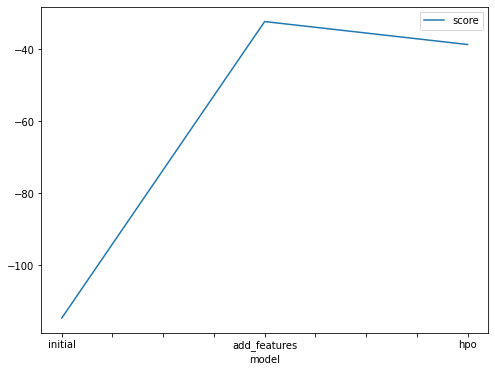

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-114.582590, -32.370638, -38.731971]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

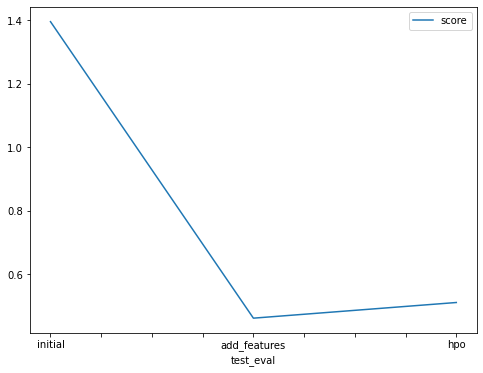

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39576 , 0.46234, 0.51163]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "time": ['600', '600', '900'],
    "num_boost_round": ['default', 'default', '100'],
    "num_epochs": ['default', 'default', '5'],
    "score": [1.39576 , 0.46234, 0.51163]
})

,model,time,num_boost_round,num_epochs,score
0,initial,600,default,default,1.39576
1,add_features,600,default,default,0.46234
2,hpo,900,100,5,0.51163
